<h1>Projeto Bemol - Analise dos dados de compras</h1>

<p> Este projeto apresenta uma analise com os dados ficticios sobre as vendas realizadas no ano 2020. As informações serão apresentadas de forma gráfica para melhor visualização dos dados.
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
dados1 = pd.read_csv('Desafio 2.0 - Relatório - Dados - Questão 1.csv')
dados1

,num_compra,usuario,nome,Tipo de Mercadoria,Filial,data_compra,valor_compra,Imposto,CPF NA NOTA?
0,24937847,295,ANDERSON,SPLIT 8501 À 10000,Loja Autazes,06/04/2020 12:25:13,"R$2,582.40",R$116.21,Sim
1,23600787,331,RAIMUNDO,SPLIT INV 8501À10000,Loja Manicor é,06/04/2020 14:03:55,"R$1,919.28",R$86.37,Sim
2,24298956,370,ROSILANE,SPLIT ACIMA DE 30000,Loja Manicor é,06/04/2020 14:35:14,"R$10,121.04",R$455.45,Sim
3,23802765,460,SANDRA,SPLIT 10001 À 18000,Loja Manicor é,06/04/2020 14:59:20,"R$11,724.00",R$527.58,Sim
4,22559356,538,JAMERSON,SPLIT 18001 À 30000,Loja Manicor é,06/04/2020 15:32:44,"R$1,157.28",R$52.08,Sim
...,...,...,...,...,...,...,...,...,...
13872,21881841,465263,SOARES,HIPOGLICEMI ORAL REF,Loja Lábrea,21/01/2019 18:43:49,R$42.38,R$1.91,Sim
13873,21881843,465620,SANTANA,ANTIHELMÍNTICO REF,Loja Lábrea,13/05/2019 14:12:40,R$59.96,R$2.70,Sim
13874,21881845,466079,SALES,ANTIVERTIGINOSO REF,Loja Lábrea,01/05/2019 14:37:10,R$37.48,R$1.69,Sim
13875,21881847,466205,AURELIANO,ESTIMULANTE REF,Loja Lábrea,05/05/2019 16:56:51,R$82.54,R$3.71,Sim


<h3>Total de Vendas por Unidade</h3>

In [4]:
dados1 = dados1.drop(['num_compra','data_compra'], axis = 1)
dados1.columns = ['Usuario','Nome','TipoMercadoria','Filial','Valor_compra','Imposto','CPF_nota']

notas =  dados1.loc[dados1['CPF_nota']=='Sim']
notas = notas.groupby('Filial').count()
notas = notas.reset_index()
notasUnidade = notas[['Filial','TipoMercadoria']]

print('TOTAL DE VENDAS POR UNIDADE')

notasUnidade

TOTAL DE VENDAS POR UNIDADE


,Filial,TipoMercadoria
0,Loja Autazes,2506
1,Loja Lábrea,4867
2,Loja Manicor é,4535


<h3>Grafico CPF na nota por Unidade</h3>
<p>O trecho de código  apresenta dois gráficos um grafico em barras que mostra a quantidade total
   de cpfs na nota e o grafico pizza que mostra a porcentagem de cpf na nota do total de vendas 
</p>

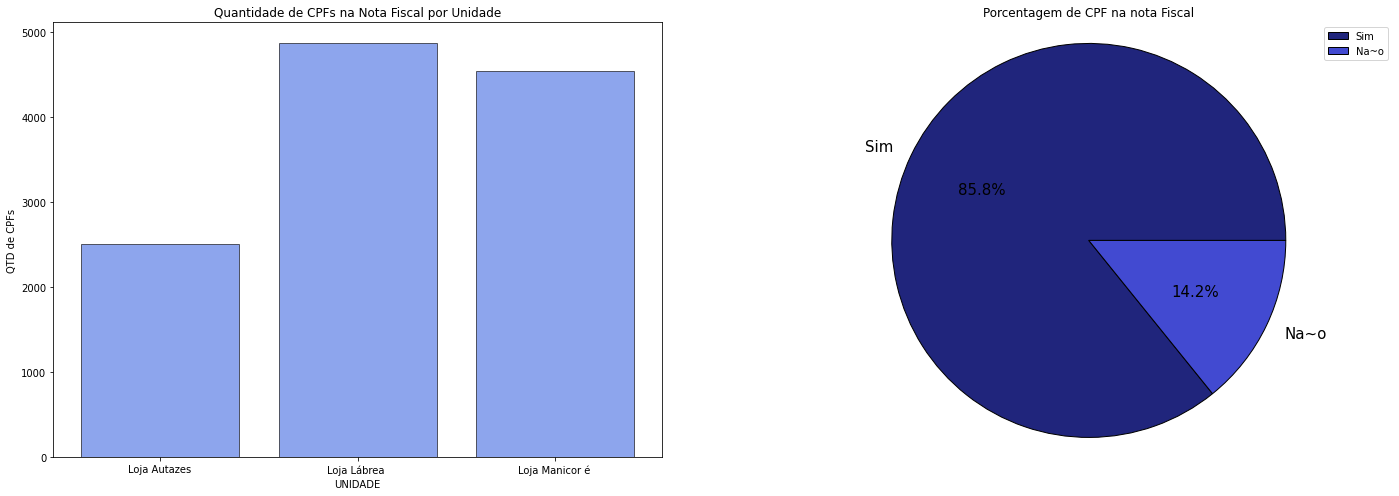

In [5]:
#Codigo gera um grafico em barras que mostra a porcentagem de CPFs na nota por Unidade
#Codigo gera um grafico pizza que mostra a porcentagem de CPFs na nota do total de vendas geral


x = notas['Filial']
y = notas['CPF_nota']

count = dados1["CPF_nota"].value_counts().values
cpfs = dados1["CPF_nota"].value_counts().index

plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)
plt.bar(x, y, ec = "k", alpha = .6,color = "royalblue")
plt.text(0.5, 0.5, '')
plt.xlabel("UNIDADE")
plt.ylabel("QTD de CPFs")
plt.title("Quantidade de CPFs na Nota Fiscal por Unidade")
plt.subplot(1, 2, 2)
plt.pie(count, 
        labels = list(cpfs),  
        colors = ["#20257c", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", "#6ce2cb", "#6ad187", "#3b7f5b"],
        labeldistance = 1.1,
        autopct='%1.1f%%',
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 15}, 
        )
plt.axis("equal")
plt.title("Porcentagem de CPF na nota Fiscal")
plt.legend()

In [75]:
#Codigo mostra qual vendendor vendeu mais em certa unidade escolhida pelo usuário


vendas =  dados1.loc[dados1['Filial']== 'Loja Autazes']
vendas = vendas.groupby('Nome').count()
Vendendor = vendas[vendas['TipoMercadoria'] == vendas['TipoMercadoria'].max()]
Vendendor = Vendendor.reset_index()
Vendendor = Vendendor[['Nome','TipoMercadoria']]
Vendendor



,Nome,TipoMercadoria
0,MARIA,87


In [67]:
#Codigo mostra a vendas feitas pelo vendenddor com amis venda por unidade

vendaMaior = dados1.loc[dados1['Nome']== "MARIA"]
vendaMaiorUnidade = vendaMaior.loc[vendaMaior['Filial']=='Loja Autazes'] 
produto = vendaMaiorUnidade.TipoMercadoria.max()
vendaMaiorUnidade 

,Usuario,Nome,TipoMercadoria,Filial,Valor_compra,Imposto,CPF_nota
448,241487,MARIA,SOFTWARES,Loja Autazes,1.98,0.09,Na~o
526,272281,MARIA,EMBALAGEM P/PRESENTE,Loja Autazes,24.63,1.11,Na~o
1008,128167,MARIA,ARTIGOS INFLÁVEIS,Loja Autazes,4.14,0.19,Sim
1255,272197,MARIA,ROCK NACIONAL,Loja Autazes,38.54,1.73,Sim
1501,9467,MARIA,ANTIENXAQUECOSO REF,Loja Autazes,31.93,1.44,Sim
...,...,...,...,...,...,...,...
11022,14607,MARIA,VIDEO GAMES 2,Loja Autazes,14.77,0.66,Sim
11301,172487,MARIA,PROTET SOLAR FACIAL,Loja Autazes,8.64,0.39,Sim
11424,247776,MARIA,PROCESSADOR ALIMENTO,Loja Autazes,1.74,0.08,Sim
11445,258711,MARIA,CARRO/MOTO ELÉTRICA,Loja Autazes,35.92,1.62,Sim


In [78]:
#Codigo mostra os produtos mais vendidos pelo vendedor
vendas =  dados1.loc[dados1['Filial']== 'Loja Autazes']
vendas = vendas.groupby('Nome').count()
Vendendor = vendas[vendas['TipoMercadoria'] == vendas['TipoMercadoria'].max()]
Vendendor = Vendendor.reset_index()
Vendendor = Vendendor[['Nome','TipoMercadoria']]
vendaMaiorUnidade.groupby('TipoMercadoria').count()
produtoMaisVendido = vendaMaiorUnidade[vendaMaiorUnidade['TipoMercadoria'] == vendaMaiorUnidade['TipoMercadoria'].max()]
produtoMaisVendido = produtoMaisVendido.reset_index()
produtoMaisVendido = produtoMaisVendido[['TipoMercadoria']]
produtoMaisVendido = pd.concat([Vendendor,produtoMaisVendido], axis=1)

produtoMaisVendido

,Nome,TipoMercadoria,TipoMercadoria
0,MARIA,87,VIDEO GAMES 2


<h3>Trecho de Código apresenta os vendedores TOP 5 que mais venderam na Unidade</h3> 

Text(0.5, 1.0, 'TOP 5 em vendas ')

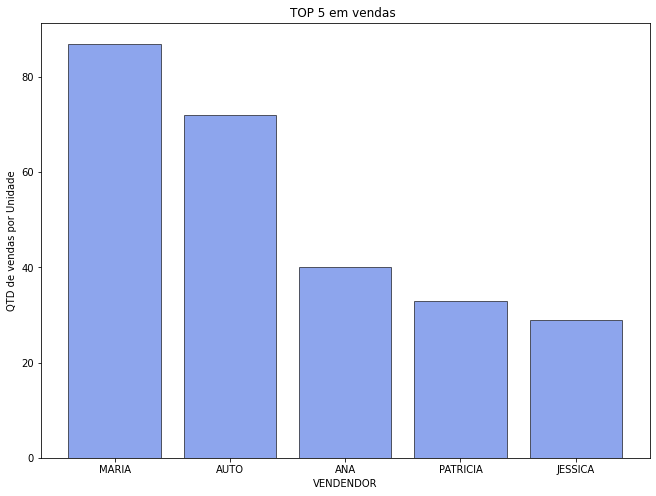

In [11]:
maioresVendas = vendas.nlargest(5, 'TipoMercadoria')
maioresVendas = maioresVendas.reset_index()
maioresVendas = maioresVendas[['Nome','TipoMercadoria']]


x1 = maioresVendas["Nome"]
y1 = maioresVendas["TipoMercadoria"]

plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)
plt.bar(x1, y1, ec = "k", alpha = .6,color = "royalblue")
plt.text(0.5, 0.5, '')
plt.xlabel("VENDENDOR")
plt.ylabel("QTD de vendas por Unidade")
plt.title("TOP 5 em vendas ")


<h3>Porcentagem de Impostos nas vendas total por unidade </h3>
<p>Trecho de codigo apresenta uma nova coluna no dataframe,coluna Imposto %, com
a informação de PORCENTAGEM de IMPOSTO das vendas total por Unidade</p>

In [58]:
dados1['Valor_compra'] = dados1['Valor_compra'].apply(lambda x: str(x).replace("R$",""))
dados1['Imposto'] = dados1['Imposto'].apply(lambda x: str(x).replace("R$",""))
dados1['Valor_compra'] = dados1['Valor_compra'].apply(lambda x: str(x).replace(",",""))
dados1['Imposto'] = dados1['Imposto'].apply(lambda x: str(x).replace(",",""))
dados1.Valor_compra = dados1.Valor_compra.astype(float)
dados1.Imposto = dados1.Imposto.astype(float)

dados1VendasTotal = dados1.groupby('Filial')['Valor_compra','Imposto'].sum().reset_index()
porcentagemImposto['Imposto %'] = porcentagemImposto['Imposto']/porcentagemImposto['Valor_compra']*100
porcentagemImposto

<ipython-input-58-28990094c7df>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dados1VendasTotal = dados1.groupby('Filial')['Valor_compra','Imposto'].sum().reset_index()


,Filial,Valor_compra,Filial,Imposto,Imposto %
0,Loja Autazes,200317.50,Loja Autazes,9014.48,4.500096
1,Loja Lábrea,602597.13,Loja Lábrea,27116.87,4.500000
2,Loja Manicor é,1029148.96,Loja Manicor é,46311.83,4.500012


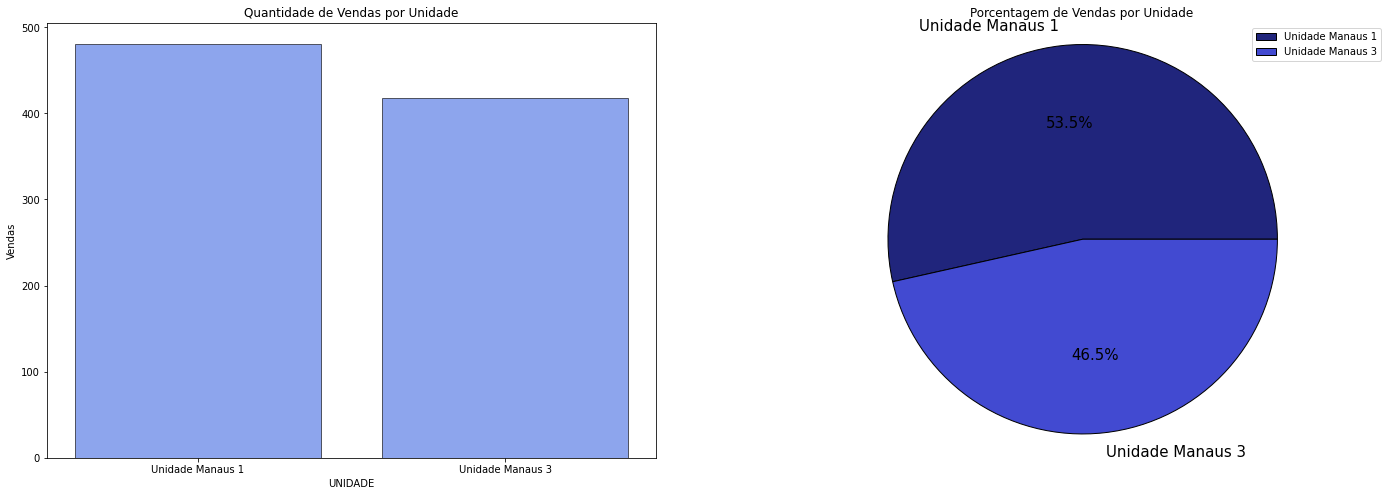

In [81]:
dados2 = pd.read_csv('Desafio 2.0 - Relatório - Dados - Questão 2.csv')
dados2 = dados2.drop(['data_compra','inicio','termino'], axis = 1)
dados2.columns = ['Loja','Unidade','Cod_Loja','Produto','EAN','Valor_Sem_Imposto','QTD','Valor_total','Imposto','Cashback']

x2 = dados2["Unidade"].value_counts().values
y2 = dados2["Unidade"].value_counts().index

plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)
plt.bar(y2, x2, ec = "k", alpha = .6,color = "royalblue")
plt.text(0.5, 0.5, '')
plt.xlabel("UNIDADE")
plt.ylabel("Vendas")
plt.title("Quantidade de Vendas por Unidade")
plt.subplot(1, 2, 2)
plt.pie(x2, 
        labels = list(y2),  
        colors = ["#20257c", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", "#6ce2cb", "#6ad187", "#3b7f5b"],
        labeldistance = 1.1,
        autopct='%1.1f%%',
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 15}, 
        )
plt.axis("equal")
plt.title("Porcentagem de Vendas por Unidade")
plt.legend()

In [82]:
dados2['Valor_total'] = dados2['Valor_total'].apply(lambda x: str(x).replace("R$",""))
dados2['Imposto'] = dados2['Imposto'].apply(lambda x: str(x).replace("R$",""))
dados2['Valor_total'] = dados2['Valor_total'].apply(lambda x: str(x).replace(",",""))
dados2['Imposto'] = dados2['Imposto'].apply(lambda x: str(x).replace(",",""))
dados2.Valor_total = dados2.Valor_total.astype(float)
dados2.Imposto = dados2.Imposto.astype(float)

#dados2VendasTotal = dados2.groupby('Unidade')['Valor_total'].sum()
#dados2ImpostoTotal = dados2.groupby('Unidade')['Cashback'].sum()
#dados2VendasTotal = dados2VendasTotal.reset_index()
#dados2ImpostoTotal = dados2ImpostoTotal.reset_index()
#porcentagemDesconto = pd.concat([dados1VendasTotal,dados1ImpostoTotal], axis=1)
#porcentagemDesconto['Imposto %'] = porcentagemImposto['Imposto']/porcentagemImposto['Valor_compra']*100
dados2['%_Desconto'] = dados2['Cashback']/dados2['Valor_total']*100
dados2 = dados2[['Unidade','Valor_total','Cashback','%_Desconto']]
dados2



,Unidade,Valor_total,Cashback,%_Desconto
0,Unidade Manaus 1,3331.29,45.0,1.350828
1,Unidade Manaus 1,3331.29,45.0,1.350828
2,Unidade Manaus 1,3331.29,45.0,1.350828
3,Unidade Manaus 1,3331.29,45.0,1.350828
4,Unidade Manaus 1,9993.87,135.0,1.350828
...,...,...,...,...
894,Unidade Manaus 3,3331.29,45.0,1.350828
895,Unidade Manaus 3,3331.29,45.0,1.350828
896,Unidade Manaus 3,9993.87,135.0,1.350828
897,Unidade Manaus 3,3331.29,45.0,1.350828
